In [1]:
import os
!pip install rtree
!curl -L http://download.osgeo.org/libspatialindex/spatialindex-src-1.8.5.tar.gz | tar xz
os.chdir("/content/spatialindex-src-1.8.5")
!./configure
!make
!make install
!ldconfig

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  556k  100  556k    0     0   390k      0  0:00:01  0:00:01 --:--:--  390k
checking build system type... x86_64-unknown-linux-gnu
checking for g++... g++
checking whether the C++ compiler works... yes
checking for C++ compiler default output file name... a.out
checking for suffix of executables... 
checking whether we are cross compiling... no
checking for suffix of object files... o
checking whether we are using the GNU C++ compiler... yes
checking whether g++ accepts -g... yes
checking how to run the C++ preprocessor... g++ -E
checking for a BSD-compatible install... /usr/bin/install -c
checking whether ln -s works... yes
checking whether make sets $(MAKE)... yes
checking host system type... x86_64-unknown-linux-gnu
checking how to print strings... printf
checking for gcc... gcc
checking whether we are using the GNU C compil

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
!pip install geopandas
import geopandas
!pip install contextily
import contextily as ctx

In [4]:
reg = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/geopandas-tutorial-master/Limiti01012021_g/Reg01012021_g')
pro = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/geopandas-tutorial-master/Limiti01012021_g/ProvCM01012021_g')
vac = pd.read_csv('https://raw.githubusercontent.com/italia/covid19-opendata-vaccini/master/dati/punti-somministrazione-latest.csv')
vac

,area,provincia,comune,presidio_ospedaliero,codice_NUTS1,codice_NUTS2,codice_regione_ISTAT,nome_area
0,ABR,CHIETI,CHIETI,PRESIDIO OSPEDALIERO SS ANNUNZIATA,ITF,ITF1,13,Abruzzo
1,ABR,CHIETI,LANCIANO,PRESIDIO OSPEDALIERO RENZETTI,ITF,ITF1,13,Abruzzo
2,ABR,CHIETI,VASTO,PRESIDIO OSPEDALIERO SAN PIO,ITF,ITF1,13,Abruzzo
3,ABR,L'AQUILA,AVEZZANO,P.O. SS. FILIPPO E NICOLA,ITF,ITF1,13,Abruzzo
4,ABR,L'AQUILA,L'AQUILA,PRESIDIO OSPEDALIERO SAN SALVATORE,ITF,ITF1,13,Abruzzo
...,...,...,...,...,...,...,...,...
288,VEN,ROVIGO,ROVIGO,"OSPEDALE ""SANTA MARIA DELLA MISERICORDIA""",ITH,ITH3,5,Veneto
289,VEN,TREVISO,VITTORIO VENETO,OSPEDALE DI VITTORIO VENETO,ITH,ITH3,5,Veneto
290,VEN,VENEZIA,VENEZIA MESTRE,OSPEDALE DELL'ANGELO,ITH,ITH3,5,Veneto
291,VEN,VERONA,VERONA,AZIENDA OSPEDALIERA UNIVERSITARIA INTEGRATA DI...,ITH,ITH3,5,Veneto


1. una mappa dell'Italia con le province colorate in base al numero di centri vaccinali Covid

In [5]:
pro['DEN_UTS']=pro['DEN_UTS'].str.upper()

In [6]:
vac_pro1= pd.merge(pro, vac, how='inner', left_on=['DEN_UTS'], right_on=['provincia'])
vac_pro1

,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_UTS,DEN_PROV,DEN_CM,DEN_UTS,SIGLA,TIPO_UTS,Shape_Leng,Shape_Area,geometry,area,provincia,comune,presidio_ospedaliero,codice_NUTS1,codice_NUTS2,codice_regione_ISTAT,nome_area
0,1,1,1,201,201,-,Torino,TORINO,TO,Citta metropolitana,539249.811270,6.828137e+09,"POLYGON ((411015.006 5049970.983, 411266.039 5...",PIE,TORINO,CHIVASSO,ASL TO 4 OSPEDALE CHIVASSO,ITC,ITC1,1,Piemonte
1,1,1,1,201,201,-,Torino,TORINO,TO,Citta metropolitana,539249.811270,6.828137e+09,"POLYGON ((411015.006 5049970.983, 411266.039 5...",PIE,TORINO,CIRIE’,ASL TO 4 OSPEDALE CIRIE’,ITC,ITC1,1,Piemonte
2,1,1,1,201,201,-,Torino,TORINO,TO,Citta metropolitana,539249.811270,6.828137e+09,"POLYGON ((411015.006 5049970.983, 411266.039 5...",PIE,TORINO,IVREA,ASL TO 4 OSPEDALE IVREA,ITC,ITC1,1,Piemonte
3,1,1,1,201,201,-,Torino,TORINO,TO,Citta metropolitana,539249.811270,6.828137e+09,"POLYGON ((411015.006 5049970.983, 411266.039 5...",PIE,TORINO,MONCALIERI,ASL TO 5 OSPEDALE MONCALIERI,ITC,ITC1,1,Piemonte
4,1,1,1,201,201,-,Torino,TORINO,TO,Citta metropolitana,539249.811270,6.828137e+09,"POLYGON ((411015.006 5049970.983, 411266.039 5...",PIE,TORINO,ORBASSANO,AOU SAN LUIGI GONZAGA ORBASSANO,ITC,ITC1,1,Piemonte
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,2,8,99,0,99,Rimini,-,RIMINI,RN,Provincia,254852.128781,8.658220e+08,"POLYGON ((779573.576 4891555.437, 780189.685 4...",EMR,RIMINI,RIMINI,OSPEDALE RIMINI,ITH,ITH5,8,Emilia-Romagna
247,3,9,100,0,100,Prato,-,PRATO,PO,Provincia,119039.644116,3.658260e+08,"POLYGON ((673895.993 4886075.201, 673938.993 4...",TOS,PRATO,PRATO,OSPEDALE SANTO STEFANO,ITI,ITI1,9,Toscana
248,4,18,101,0,101,Crotone,-,CROTONE,KR,Provincia,255379.678840,1.734212e+09,"POLYGON ((1193301.060 4396651.846, 1193357.426...",CAL,CROTONE,CROTONE,OSPEDALE SPOKE CROTONE,ITF,ITF6,18,Calabria
249,4,18,102,0,102,Vibo Valentia,-,VIBO VALENTIA,VV,Provincia,202524.198570,1.148196e+09,"POLYGON ((1133745.148 4322320.462, 1134354.272...",CAL,VIBO VALENTIA,VIBO VALENTIA,OSPEDALE SPOKE VIBO VALENTIA,ITF,ITF6,18,Calabria


In [7]:
punti_pro= vac_pro1.groupby('DEN_UTS').count().reset_index()[['DEN_UTS','presidio_ospedaliero']]
punti_pro

,DEN_UTS,presidio_ospedaliero
0,AGRIGENTO,5
1,ALESSANDRIA,4
2,ANCONA,2
3,AOSTA,2
4,AREZZO,1
...,...,...
86,VERCELLI,2
87,VERONA,1
88,VIBO VALENTIA,1
89,VICENZA,1


In [8]:
punti_province= pd.merge(pro, punti_pro, how='inner', on=['DEN_UTS'])
punti_province

,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_UTS,DEN_PROV,DEN_CM,DEN_UTS,SIGLA,TIPO_UTS,Shape_Leng,Shape_Area,geometry,presidio_ospedaliero
0,1,1,1,201,201,-,Torino,TORINO,TO,Citta metropolitana,539249.811270,6.828137e+09,"POLYGON ((411015.006 5049970.983, 411266.039 5...",10
1,1,1,2,0,2,Vercelli,-,VERCELLI,VC,Provincia,418078.067821,2.082097e+09,"POLYGON ((438328.612 5087208.215, 439028.888 5...",2
2,1,1,3,0,3,Novara,-,NOVARA,NO,Provincia,250242.112077,1.341318e+09,"POLYGON ((460929.542 5076320.298, 461165.259 5...",3
3,1,1,4,0,4,Cuneo,-,CUNEO,CN,Provincia,490111.881318,6.898443e+09,"MULTIPOLYGON (((378673.492 4958865.159, 378928...",4
4,1,1,5,0,5,Asti,-,ASTI,AT,Provincia,315563.261771,1.508947e+09,"POLYGON ((425041.329 4997628.309, 424948.989 4...",2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,2,8,99,0,99,Rimini,-,RIMINI,RN,Provincia,254852.128781,8.658220e+08,"POLYGON ((779573.576 4891555.437, 780189.685 4...",1
87,3,9,100,0,100,Prato,-,PRATO,PO,Provincia,119039.644116,3.658260e+08,"POLYGON ((673895.993 4886075.201, 673938.993 4...",1
88,4,18,101,0,101,Crotone,-,CROTONE,KR,Provincia,255379.678840,1.734212e+09,"POLYGON ((1193301.060 4396651.846, 1193357.426...",1
89,4,18,102,0,102,Vibo Valentia,-,VIBO VALENTIA,VV,Provincia,202524.198570,1.148196e+09,"POLYGON ((1133745.148 4322320.462, 1134354.272...",1


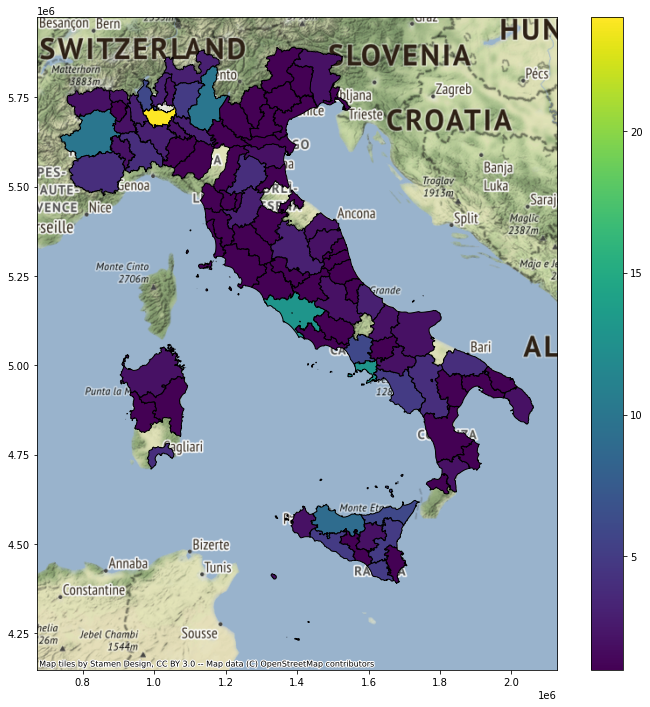

In [9]:
ax = punti_province.to_crs(epsg=3857).plot(figsize = (12,12), column="presidio_ospedaliero", legend = True, edgecolor = "k")
ctx.add_basemap(ax)

2. una mappa dell'Italia con le regioni colorate in base alla percentuale di guariti dal Covid rispetto la popolazione

In [10]:
gua= pd.read_csv('https://raw.githubusercontent.com/italia/covid19-opendata-vaccini/master/dati/soggetti-guariti.csv')
guariti= gua.groupby('nome_area')['totale_guariti'].sum().reset_index()
guariti

,nome_area,totale_guariti
0,Abruzzo,32274
1,Basilicata,9446
2,Calabria,37021
3,Campania,180294
4,Emilia-Romagna,189744
5,Friuli-Venezia Giulia,64525
6,Lazio,172892
7,Liguria,57952
8,Lombardia,306057
9,Marche,64393


In [11]:
pla = pd.read_csv('https://raw.githubusercontent.com/italia/covid19-opendata-vaccini/master/dati/platea.csv')
platea = pla.groupby('nome_area')['totale_popolazione'].sum().reset_index()
platea

,nome_area,totale_popolazione
0,Abruzzo,1265353
1,Basilicata,524588
2,Calabria,1803821
3,Campania,5484138
4,Emilia-Romagna,4298305
5,Friuli-Venezia Giulia,1162352
6,Lazio,5528280
7,Liguria,1479768
8,Lombardia,9898997
9,Marche,1456240


In [12]:
pla_gua= pd.merge(guariti, platea, how='inner', on=['nome_area'])
pla_gua

,nome_area,totale_guariti,totale_popolazione
0,Abruzzo,32274,1265353
1,Basilicata,9446,524588
2,Calabria,37021,1803821
3,Campania,180294,5484138
4,Emilia-Romagna,189744,4298305
5,Friuli-Venezia Giulia,64525,1162352
6,Lazio,172892,5528280
7,Liguria,57952,1479768
8,Lombardia,306057,9898997
9,Marche,64393,1456240


In [13]:
pla_gua['percentuale']=pla_gua['totale_guariti']/pla_gua['totale_popolazione']*100

In [14]:
pla_gua['nome_area']=pla_gua['nome_area'].replace({'Friuli-Venezia Giulia':'Friuli Venezia Giulia'})

In [15]:
gua_reg= pd.merge(reg,pla_gua,how='inner',left_on=['DEN_REG'],right_on=['nome_area'])
gua_reg

,COD_RIP,COD_REG,DEN_REG,Shape_Leng,Shape_Area,geometry,nome_area,totale_guariti,totale_popolazione,percentuale
0,1,1,Piemonte,1.235512e+06,2.539390e+10,"POLYGON ((457749.464 5145501.795, 458662.395 5...",Piemonte,168814,4175308,4.043151
1,1,2,Valle d'Aosta,3.109681e+05,3.258838e+09,"POLYGON ((390652.644 5091766.171, 390748.643 5...",Valle d'Aosta,5647,117843,4.791969
2,1,3,Lombardia,1.410223e+06,2.386232e+10,"MULTIPOLYGON (((485536.366 4985444.605, 485366...",Lombardia,306057,9898997,3.091798
3,2,5,Veneto,1.054587e+06,1.834355e+10,"POLYGON ((768123.960 5175397.497, 768135.210 5...",Veneto,237707,4684141,5.074719
4,2,6,Friuli Venezia Giulia,6.700448e+05,7.933911e+09,"MULTIPOLYGON (((872344.457 5061894.048, 872344...",Friuli Venezia Giulia,64525,1162352,5.551244
5,1,7,Liguria,8.205420e+05,5.414612e+09,"MULTIPOLYGON (((568226.691 4874823.573, 568219...",Liguria,57952,1479768,3.916290
6,2,8,Emilia-Romagna,1.176188e+06,2.244275e+10,"MULTIPOLYGON (((618343.929 4893985.661, 618335...",Emilia-Romagna,189744,4298305,4.414391
7,3,9,Toscana,1.306596e+06,2.298352e+10,"MULTIPOLYGON (((674426.642 4680710.364, 674563...",Toscana,122870,3579722,3.432389
8,3,10,Umbria,6.197684e+05,8.464380e+09,"MULTIPOLYGON (((776982.140 4832209.918, 776910...",Umbria,24392,839373,2.905979
9,3,11,Marche,6.261785e+05,9.400594e+09,"POLYGON ((802303.985 4874996.456, 802366.734 4...",Marche,64393,1456240,4.421867


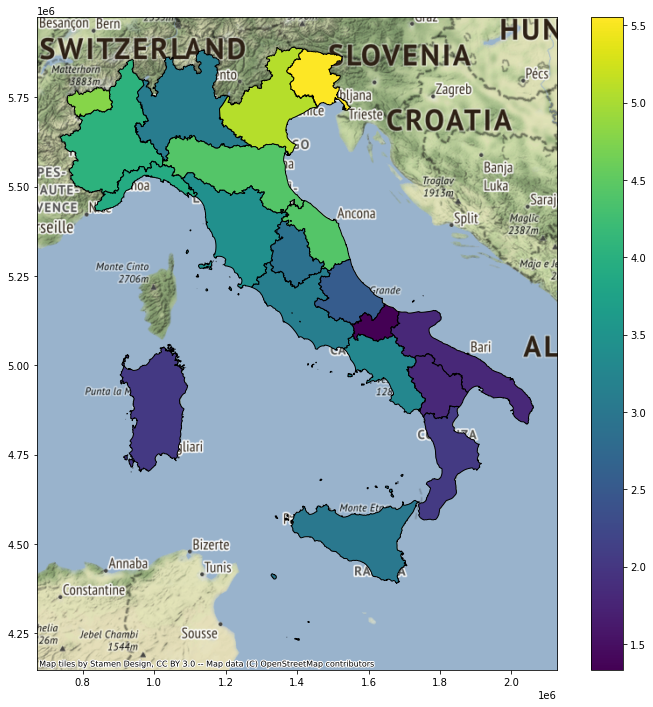

In [16]:
ax = gua_reg.to_crs(epsg=3857).plot(figsize = (12,12), column="percentuale", legend = True, edgecolor = "k")
ctx.add_basemap(ax)

3. una mappa dell'Italia con le regioni colorate in rosso se la percentuale di vaccinati (prima vaccinazione) è inferiore alla media e in verde se l apercentuale di vaccinati è superiore alla media

In [18]:
vaccini= pd.read_csv('https://raw.githubusercontent.com/italia/covid19-opendata-vaccini/master/dati/somministrazioni-vaccini-summary-latest.csv')
vaccini

,data_somministrazione,area,totale,sesso_maschile,sesso_femminile,prima_dose,seconda_dose,pregressa_infezione,dose_addizionale_booster,codice_NUTS1,codice_NUTS2,codice_regione_ISTAT,nome_area
0,2021-03-08,VDA,488,233,255,243,245,0,0,ITC,ITC2,2,Valle d'Aosta / Vallée d'Aoste
1,2021-04-23,UMB,6776,2871,3905,3307,3267,202,0,ITI,ITI2,10,Umbria
2,2021-08-12,VDA,378,204,174,118,248,12,0,ITC,ITC2,2,Valle d'Aosta / Vallée d'Aoste
3,2021-08-27,TOS,16473,8821,7652,7872,8056,545,0,ITI,ITI1,9,Toscana
4,2021-12-07,LOM,91847,41594,50253,4158,2318,408,84963,ITC,ITC4,3,Lombardia
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8622,2021-04-15,MOL,1978,815,1163,1108,861,9,0,ITF,ITF2,14,Molise
8623,2021-07-11,PAT,1045,567,478,134,902,9,0,ITH,ITH2,4,Provincia Autonoma Trento
8624,2021-08-11,VEN,26873,14849,12024,15647,10598,628,0,ITH,ITH3,5,Veneto
8625,2021-09-19,MOL,15,13,2,13,2,0,0,ITF,ITF2,14,Molise


In [19]:
vaccinati= vaccini.groupby('nome_area')['prima_dose'].sum().reset_index()
vaccinati

,nome_area,prima_dose
0,Abruzzo,1046348
1,Basilicata,453935
2,Calabria,1510718
3,Campania,4528492
4,Emilia-Romagna,3647682
5,Friuli-Venezia Giulia,961656
6,Lazio,4832987
7,Liguria,1252625
8,Lombardia,8398142
9,Marche,1187118


In [23]:
vac_reg= pd.merge(reg, vaccinati,how='inner',left_on=['DEN_REG'],right_on=['nome_area'])
vac_reg

,COD_RIP,COD_REG,DEN_REG,Shape_Leng,Shape_Area,geometry,nome_area,prima_dose
0,1,1,Piemonte,1.235512e+06,2.539390e+10,"POLYGON ((457749.464 5145501.795, 458662.395 5...",Piemonte,3461784
1,1,3,Lombardia,1.410223e+06,2.386232e+10,"MULTIPOLYGON (((485536.366 4985444.605, 485366...",Lombardia,8398142
2,2,5,Veneto,1.054587e+06,1.834355e+10,"POLYGON ((768123.960 5175397.497, 768135.210 5...",Veneto,3877602
3,1,7,Liguria,8.205420e+05,5.414612e+09,"MULTIPOLYGON (((568226.691 4874823.573, 568219...",Liguria,1252625
4,2,8,Emilia-Romagna,1.176188e+06,2.244275e+10,"MULTIPOLYGON (((618343.929 4893985.661, 618335...",Emilia-Romagna,3647682
5,3,9,Toscana,1.306596e+06,2.298352e+10,"MULTIPOLYGON (((674426.642 4680710.364, 674563...",Toscana,3123148
6,3,10,Umbria,6.197684e+05,8.464380e+09,"MULTIPOLYGON (((776982.140 4832209.918, 776910...",Umbria,717740
7,3,11,Marche,6.261785e+05,9.400594e+09,"POLYGON ((802303.985 4874996.456, 802366.734 4...",Marche,1187118
8,3,12,Lazio,1.054578e+06,1.722679e+10,"MULTIPOLYGON (((875952.995 4524692.050, 875769...",Lazio,4832987
9,4,13,Abruzzo,6.153465e+05,1.082885e+10,"MULTIPOLYGON (((930273.425 4714737.743, 930147...",Abruzzo,1046348


In [24]:
vac_pop= pd.merge(vac_reg, platea,how='inner',on=['nome_area'])
vac_pop

,COD_RIP,COD_REG,DEN_REG,Shape_Leng,Shape_Area,geometry,nome_area,prima_dose,totale_popolazione
0,1,1,Piemonte,1.235512e+06,2.539390e+10,"POLYGON ((457749.464 5145501.795, 458662.395 5...",Piemonte,3461784,4175308
1,1,3,Lombardia,1.410223e+06,2.386232e+10,"MULTIPOLYGON (((485536.366 4985444.605, 485366...",Lombardia,8398142,9898997
2,2,5,Veneto,1.054587e+06,1.834355e+10,"POLYGON ((768123.960 5175397.497, 768135.210 5...",Veneto,3877602,4684141
3,1,7,Liguria,8.205420e+05,5.414612e+09,"MULTIPOLYGON (((568226.691 4874823.573, 568219...",Liguria,1252625,1479768
4,2,8,Emilia-Romagna,1.176188e+06,2.244275e+10,"MULTIPOLYGON (((618343.929 4893985.661, 618335...",Emilia-Romagna,3647682,4298305
5,3,9,Toscana,1.306596e+06,2.298352e+10,"MULTIPOLYGON (((674426.642 4680710.364, 674563...",Toscana,3123148,3579722
6,3,10,Umbria,6.197684e+05,8.464380e+09,"MULTIPOLYGON (((776982.140 4832209.918, 776910...",Umbria,717740,839373
7,3,11,Marche,6.261785e+05,9.400594e+09,"POLYGON ((802303.985 4874996.456, 802366.734 4...",Marche,1187118,1456240
8,3,12,Lazio,1.054578e+06,1.722679e+10,"MULTIPOLYGON (((875952.995 4524692.050, 875769...",Lazio,4832987,5528280
9,4,13,Abruzzo,6.153465e+05,1.082885e+10,"MULTIPOLYGON (((930273.425 4714737.743, 930147...",Abruzzo,1046348,1265353


In [26]:
vac_pop['percentuale']=vac_pop['prima_dose']/vac_pop['totale_popolazione']*100
vac_pop

,COD_RIP,COD_REG,DEN_REG,Shape_Leng,Shape_Area,geometry,nome_area,prima_dose,totale_popolazione,percentuale
0,1,1,Piemonte,1.235512e+06,2.539390e+10,"POLYGON ((457749.464 5145501.795, 458662.395 5...",Piemonte,3461784,4175308,82.910865
1,1,3,Lombardia,1.410223e+06,2.386232e+10,"MULTIPOLYGON (((485536.366 4985444.605, 485366...",Lombardia,8398142,9898997,84.838312
2,2,5,Veneto,1.054587e+06,1.834355e+10,"POLYGON ((768123.960 5175397.497, 768135.210 5...",Veneto,3877602,4684141,82.781496
3,1,7,Liguria,8.205420e+05,5.414612e+09,"MULTIPOLYGON (((568226.691 4874823.573, 568219...",Liguria,1252625,1479768,84.650094
4,2,8,Emilia-Romagna,1.176188e+06,2.244275e+10,"MULTIPOLYGON (((618343.929 4893985.661, 618335...",Emilia-Romagna,3647682,4298305,84.863266
5,3,9,Toscana,1.306596e+06,2.298352e+10,"MULTIPOLYGON (((674426.642 4680710.364, 674563...",Toscana,3123148,3579722,87.245546
6,3,10,Umbria,6.197684e+05,8.464380e+09,"MULTIPOLYGON (((776982.140 4832209.918, 776910...",Umbria,717740,839373,85.509065
7,3,11,Marche,6.261785e+05,9.400594e+09,"POLYGON ((802303.985 4874996.456, 802366.734 4...",Marche,1187118,1456240,81.519392
8,3,12,Lazio,1.054578e+06,1.722679e+10,"MULTIPOLYGON (((875952.995 4524692.050, 875769...",Lazio,4832987,5528280,87.422978
9,4,13,Abruzzo,6.153465e+05,1.082885e+10,"MULTIPOLYGON (((930273.425 4714737.743, 930147...",Abruzzo,1046348,1265353,82.692182


In [27]:
media= vac_pop['percentuale'].mean()
media

84.64479574343098

In [31]:
vac_mean= vac_pop[vac_pop['percentuale']< media]
vac_mean

,COD_RIP,COD_REG,DEN_REG,Shape_Leng,Shape_Area,geometry,nome_area,prima_dose,totale_popolazione,percentuale
0,1,1,Piemonte,1.235512e+06,2.539390e+10,"POLYGON ((457749.464 5145501.795, 458662.395 5...",Piemonte,3461784,4175308,82.910865
2,2,5,Veneto,1.054587e+06,1.834355e+10,"POLYGON ((768123.960 5175397.497, 768135.210 5...",Veneto,3877602,4684141,82.781496
7,3,11,Marche,6.261785e+05,9.400594e+09,"POLYGON ((802303.985 4874996.456, 802366.734 4...",Marche,1187118,1456240,81.519392
9,4,13,Abruzzo,6.153465e+05,1.082885e+10,"MULTIPOLYGON (((930273.425 4714737.743, 930147...",Abruzzo,1046348,1265353,82.692182
11,4,15,Campania,8.881667e+05,1.366325e+10,"MULTIPOLYGON (((1037313.692 4449410.367, 10373...",Campania,4528492,5484138,82.574363
14,4,18,Calabria,8.378109e+05,1.521607e+10,"MULTIPOLYGON (((1083358.846 4416348.741, 10833...",Calabria,1510718,1803821,83.750993
15,5,19,Sicilia,1.334638e+06,2.582376e+10,"MULTIPOLYGON (((822886.611 3935355.889, 822871...",Sicilia,3834663,4665412,82.193448


In [29]:
vac_mean_min= vac_pop[vac_pop['percentuale']> media]
vac_mean_min

,COD_RIP,COD_REG,DEN_REG,Shape_Leng,Shape_Area,geometry,nome_area,prima_dose,totale_popolazione,percentuale
1,1,3,Lombardia,1.410223e+06,2.386232e+10,"MULTIPOLYGON (((485536.366 4985444.605, 485366...",Lombardia,8398142,9898997,84.838312
3,1,7,Liguria,8.205420e+05,5.414612e+09,"MULTIPOLYGON (((568226.691 4874823.573, 568219...",Liguria,1252625,1479768,84.650094
4,2,8,Emilia-Romagna,1.176188e+06,2.244275e+10,"MULTIPOLYGON (((618343.929 4893985.661, 618335...",Emilia-Romagna,3647682,4298305,84.863266
5,3,9,Toscana,1.306596e+06,2.298352e+10,"MULTIPOLYGON (((674426.642 4680710.364, 674563...",Toscana,3123148,3579722,87.245546
6,3,10,Umbria,6.197684e+05,8.464380e+09,"MULTIPOLYGON (((776982.140 4832209.918, 776910...",Umbria,717740,839373,85.509065
8,3,12,Lazio,1.054578e+06,1.722679e+10,"MULTIPOLYGON (((875952.995 4524692.050, 875769...",Lazio,4832987,5528280,87.422978
10,4,14,Molise,4.338181e+05,4.461183e+09,"POLYGON ((984002.800 4670714.415, 985067.040 4...",Molise,250950,288826,86.886222
12,4,16,Puglia,1.175757e+06,1.953616e+10,"MULTIPOLYGON (((1280636.111 4454459.746, 12806...",Puglia,3325820,3819923,87.065106
13,4,17,Basilicata,6.142055e+05,1.007274e+10,"MULTIPOLYGON (((1073707.061 4445700.106, 10737...",Basilicata,453935,524588,86.531716
16,5,20,Sardegna,1.438638e+06,2.409463e+10,"MULTIPOLYGON (((448813.650 4301762.751, 448823...",Sardegna,1341630,1568672,85.526484


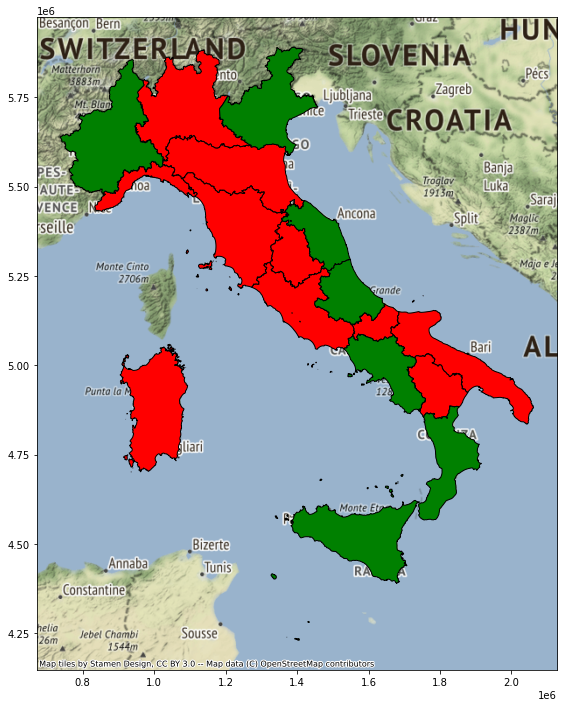

In [32]:
ax= vac_mean_min.to_crs(epsg=3857).plot(figsize = (12,12),facecolor='r', edgecolor = "k")
vac_mean.to_crs(epsg=3857).plot(ax=ax,facecolor='g', edgecolor = "k")
ctx.add_basemap(ax)